In [1]:
from sympy import Function, rsolve
from sympy.abc import n



y = Function('y')
f=y(n+2)-y(n+1)-y(n)
ff=rsolve(f, y(n),{y(1):1,y(2):1})
print(ff)

-sqrt(5)*(1/2 - sqrt(5)/2)**n/5 + sqrt(5)*(1/2 + sqrt(5)/2)**n/5


In [2]:
import sympy as sp



sp.var('k'); sp.var('y',cls=sp.Function)
f = y(k+1)-y(k)-3-2*k
f1 = sp.rsolve(f, y(k)); f2 = sp.simplify(f1)
print(f2)

C0 + k**2 + 2*k + 3/4


In [3]:
x0=1000000; r=0.005; N=500; n=0; xm=8000
x1=x0*(1+r)-xm
while n<=N and x1>0:
    n+=1;
    if n%12==0:
        print("第%d个月末欠钱：x(%d)=%.4f"%(n,n,x1))
    x0=x1; x1=x0*(1+r)-xm
print("还款月数n=",n+1)
print("还款%d年%d个月"%((n+1)//12,n+1-12*((n+1)//12)))


第12个月末欠钱：x(12)=962993.3129
第24个月末欠钱：x(24)=923704.1343
第36个月末欠钱：x(36)=881991.6851
第48个月末欠钱：x(48)=837706.5033
第60个月末欠钱：x(60)=790689.9085
第72个月末欠钱：x(72)=740773.4329
第84个月末欠钱：x(84)=687778.2184
第96个月末欠钱：x(96)=631514.3749
第108个月末欠钱：x(108)=571780.3007
第120个月末欠钱：x(120)=508361.9596
第132个月末欠钱：x(132)=441032.1139
第144个月末欠钱：x(144)=369549.5107
第156个月末欠钱：x(156)=293658.0169
第168个月末欠钱：x(168)=213085.7018
第180个月末欠钱：x(180)=127543.8627
第192个月末欠钱：x(192)=36725.9900
还款月数n= 197
还款16年5个月


TX= [[ 7000.     2750.    14375.     8125.    29781.25 ]
 [  500.     3500.     1375.     7187.5    4062.5  ]
 [  250.      125.      875.      343.75   1796.875]]


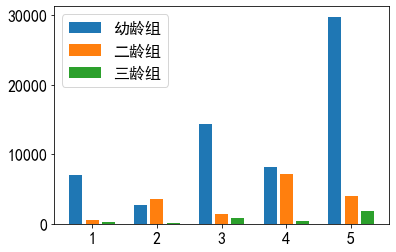

特征值= [ 1.5        -1.30901699 -0.19098301] 
特征向量为：
 [[ 0.94736842 -0.93201073  0.225884  ]
 [ 0.31578947  0.35599642 -0.591372  ]
 [ 0.05263158 -0.06798927  0.774116  ]] 
c= 2999.9999999999995


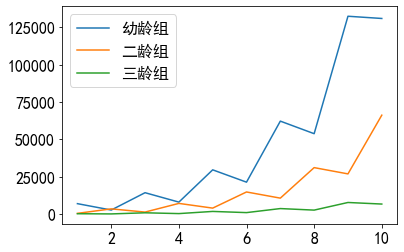

In [4]:
import numpy as np
from numpy.linalg import eig, inv
from matplotlib.pyplot import bar, show, legend, rc, plot





rc('font',size=16); rc('font',family='SimHei')
L=np.array([[0,4,3],[0.5,0,0],[0,0.25,0]])
X=1000*np.ones((3,1)); TX=np.zeros((3,5))
for i in range(5): X=L.dot(X); TX[:,i]=X.flatten()
print("TX=",TX)
for i in range(3): bar(np.arange(1,6)-0.25+i/4,TX[i],width=0.2)
legend(('幼龄组','二龄组','三龄组')); show()

val,vec=eig(L)  #计算特征值及对应的特征向量
cv=inv(vec).dot(1000*np.ones(3)); c=abs(cv[0])
print("特征值=",val,"\n特征向量为：\n",vec,'\nc=',c)

s=int(input("输入s的值:")); m=10  #计算10年
TY=[]; Y=np.ones(3)*1000; TY=np.zeros((m,3))
for i in range(1,m+1):
    Y=L.dot(Y)-s*np.ones(3); TY[i-1,:]=Y.flatten()
plot(np.arange(1,m+1),TY)
legend(('幼龄组','二龄组','三龄组')); show()

[99.875, 99.628125, 99.262421875, 98.780861328125, 98.18633979492188, 97.48168130004883, 96.66963926754761, 95.75289828585892, 94.73407582871245, 93.61572393299464]
k=22时,w(22)=74.9888
[99.375, 98.64375, 97.8094375, 96.875154375, 95.84389974374999, 94.71858275143748, 93.50202526889436, 92.19696451082753, 90.8060555755027, 89.33187390823761]
k=12时,w(12)=74.7388


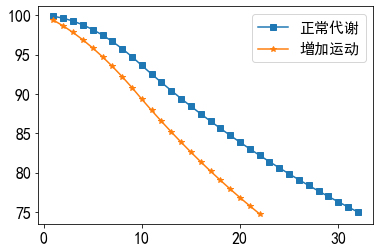

In [5]:
import numpy as np
import matplotlib.pyplot as plt




def fun(delta,*str):
    w=100; tw=[]
    for k in range(1,11):
        w=delta*w+2.5-0.125*k; tw.append(w)
    print(tw); w2=tw[-1]  #提取第二阶段的初值
    tw2=[]; k=0
    while w2>=75:
        k+=1; w2=delta*w2+1.25;
        tw2.append(w2); tw.append(w2)
    print("k=%d时,w(%d)=%.4f"%(k,k,w2))

    plt.plot(np.arange(1,len(tw)+1),tw,str[0])



fun(0.975,"s-")
fun(0.97,"*-")

plt.legend(("正常代谢","增加运动"),prop={'family': 'SimHei', 'size': 15})
plt.show()

[99.875, 99.628125, 99.262421875, 98.780861328125, 98.18633979492188, 97.48168130004883, 96.66963926754761, 95.75289828585892, 94.73407582871245, 93.61572393299464]
k=22时,w(22)=74.9888
[99.375, 98.64375, 97.8094375, 96.875154375, 95.84389974374999, 94.71858275143748, 93.50202526889436, 92.19696451082753, 90.8060555755027, 89.33187390823761]
k=12时,w(12)=74.7388


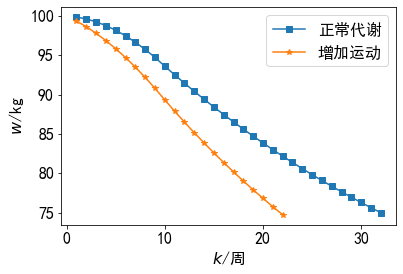

In [6]:
import numpy as np
import matplotlib.pyplot as plt



plt.rc('font', family='SimHei'); plt.rc('font',size=16)
def fun(delta,*s):
    w=100; tw=[]
    for k in range(1,11):
        w=delta*w+2.5-0.125*k; tw.append(w)
    print(tw); w2=tw[-1]  #提取第二阶段的初值
    tw2=[]; k=0
    while w2>=75:
        k+=1; w2=delta*w2+1.25;
        tw2.append(w2); tw.append(w2)
    print("k=%d时,w(%d)=%.4f"%(k,k,w2))
    plt.plot(np.arange(1,len(tw)+1),tw,s[0])  #传入的s是tuple类型




fun(0.975,"s-"); fun(0.97,"*-")
plt.legend(("正常代谢","增加运动"))
plt.xlabel("$k$/周"); plt.ylabel("$w$/kg")
plt.show()

[99.875, 99.628125, 99.262421875, 98.780861328125, 98.18633979492188, 97.48168130004883, 96.66963926754761, 95.75289828585892, 94.73407582871245, 93.61572393299464]
k=22时,w(22)=74.9888
[99.375, 98.64375, 97.8094375, 96.875154375, 95.84389974374999, 94.71858275143748, 93.50202526889436, 92.19696451082753, 90.8060555755027, 89.33187390823761]
k=12时,w(12)=74.7388


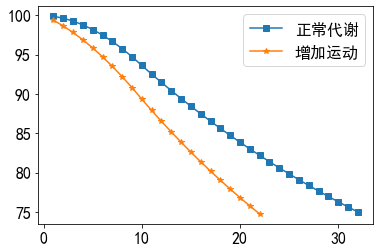

In [7]:
import numpy as np
import matplotlib.pyplot as plt




def fun(delta,*str):
    w=100; tw=[]
    for k in range(1,11):
        w=delta*w+2.5-0.125*k; tw.append(w)
    print(tw); w2=tw[-1]  #提取第二阶段的初值
    tw2=[]; k=0
    while w2>=75:
        k+=1; w2=delta*w2+1.25;
        tw2.append(w2); tw.append(w2)
    print("k=%d时,w(%d)=%.4f"%(k,k,w2))
    plt.plot(np.arange(1,len(tw)+1),tw,str[0])



def fun2(datas,labels):
    for data, style in datas:
        fun(data, style)
    plt.legend(labels, prop={'family': 'SimHei', 'size': 16})
    plt.show()



fun2([(0.975,"s-"),(0.97,"*-")],("正常代谢","增加运动"))


[99.875, 99.628125, 99.262421875, 98.780861328125, 98.18633979492188, 97.48168130004883, 96.66963926754761, 95.75289828585892, 94.73407582871245, 93.61572393299464]
k=22时,w(22)=74.9888
[99.375, 98.64375, 97.8094375, 96.875154375, 95.84389974374999, 94.71858275143748, 93.50202526889436, 92.19696451082753, 90.8060555755027, 89.33187390823761]
k=12时,w(12)=74.7388


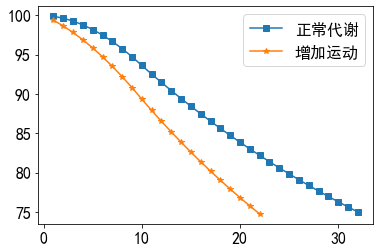

In [8]:
import numpy as np
import matplotlib.pyplot as plt




def fun(delta,*str):
    w=100; tw=[]
    for k in range(1,11):
        w=delta*w+2.5-0.125*k; tw.append(w)
    print(tw); w2=tw[-1]  #提取第二阶段的初值
    tw2=[]; k=0
    while w2>=75:
        k+=1; w2=delta*w2+1.25;
        tw2.append(w2); tw.append(w2)
    print("k=%d时,w(%d)=%.4f"%(k,k,w2))
    plt.plot(np.arange(1,len(tw)+1),tw,str[0])



def fun2(datas,labels):
    for data, style in datas:
        fun(data, style)
    plt.legend(labels, prop={'family': 'SimHei', 'size': 16})
    plt.show()



fun2([(0.975,"s-"),(0.97,"*-")],("正常代谢","增加运动"))


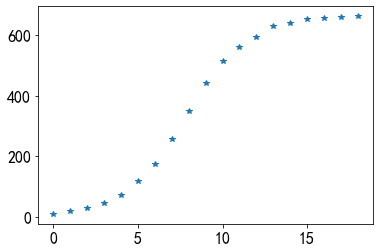

r,s,N的拟合值分别为： 0.5576851102961459 	 0.0008526660069981637 	 654.0487198023679


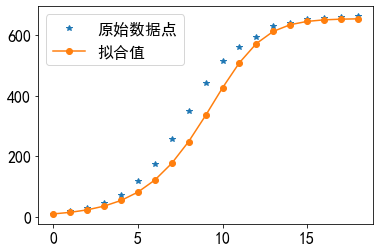

所有已知点的预测值的相对误差 [0.         0.18714779 0.20751036 0.25108755 0.24055326 0.3146622
 0.30433425 0.31355683 0.29135431 0.24159705 0.17086125 0.09147712
 0.03899245 0.02798153 0.01087147 0.0097392  0.00919947 0.01124355
 0.01296336]
最大相对误差: 0.31466220364425074


In [9]:
import numpy as np
from matplotlib.pyplot import rc, plot, show, legend, figure




rc('font',size=16); rc('font',family='SimHei')
a=np.loadtxt("./数据集/Pdata13_6.txt"); 
plot(np.arange(0,19),a,'*'); show()
b=np.c_[a[:-1],-a[:-1]**2]
c=np.diff(a); x=np.linalg.pinv(b).dot(c)
r=x[0]; N=x[0]/x[1]
print("r,s,N的拟合值分别为：",r,'\t',x[1],'\t',N)
Tx=np.zeros(19); Tx[0]=9.6; x0=9.6


for i in range(1,19):
    xn=x0+r*x0*(1-x0/N)
    Tx[i]=xn; x0=xn



figure; plot(np.arange(0,19),a,'*')
plot(np.arange(19), Tx,'o-')
legend(("原始数据点","拟合值"), loc='best'); show()
delta=np.abs((Tx-a)/a);
print("所有已知点的预测值的相对误差",delta)
print("最大相对误差:",delta.max())

In [10]:
import sympy as sp


a0,b0, c0=sp.symbols('a0 b0 c0')
n=sp.symbols('n',positive=True)
A=sp.Matrix([[1,1/2,0],[0,1/2,1],[0,0,0]])


if A.is_diagonalizable():
    print("A的对角化矩阵为：\n",A.diagonalize())
else:
    print("A不能对角化")


P=A.diagonalize()[0]; D=A.diagonalize()[1]
x=P*D**n*(P.inv())*sp.Matrix([a0,b0,c0])
x=sp.simplify(x); print(x)

A的对角化矩阵为：
 (Matrix([
[1.0, -1.0,  0.5],
[  0,  1.0, -1.0],
[  0,    0,  0.5]]), Matrix([
[1.0,   0, 0],
[  0, 0.5, 0],
[  0,   0, 0]]))
Matrix([[1.0**(n + 1)*a0 - 1.0*b0*(0.5**n - 1.0**n) + c0*(1.0*1.0**n - 2.0**(1 - n))], [1.0*0.5**n*b0 + 2.0**(1 - n)*c0], [0]])


In [11]:
import sympy as sp



a0,b0, c0=sp.symbols('a0 b0 c0')
n=sp.symbols('n',positive=True)
A=sp.Matrix([[1,1/4,0],[0,1/2,0],[0,1/4,1]])
if A.is_diagonalizable(): print("A的对角化矩阵为：\n",A.diagonalize())
else: print("A不能对角化")
P=A.diagonalize()[0]; D=A.diagonalize()[1]
x=P*D**n*(P.inv())*sp.Matrix([a0,b0,c0])
x=sp.simplify(x); print(x)

A的对角化矩阵为：
 (Matrix([
[1.0, -0.447213595499958,                 0.125],
[  0,  0.894427190999916, -1.35889503772629e-64],
[  0, -0.447213595499958,     -1.11803398874989]]), Matrix([
[1.0,   0,   0],
[  0, 0.5,   0],
[  0,   0, 1.0]]))
Matrix([[6.07716335728627e-65*0.5**n*c0 + 1.0**(n + 1)*a0 - b0*(0.5**(n + 1) - 0.5*1.0**n)], [b0*(1.0*0.5**n + 6.07716335728627e-65*1.0**n) - 1.21543267145725e-64*c0*(0.5**n - 1.0**n)], [-b0*(0.5**(n + 1) - 0.5*1.0**n) + c0*(6.07716335728627e-65*0.5**n + 1.0**(n + 1))]])


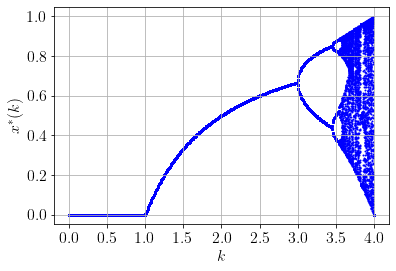

In [12]:
import numpy as np
import matplotlib.pyplot as plt




plt.rc('text',usetex=True); plt.rc('font',size=16)
logistic=lambda k, x: k*x*(1-x)
kk=np.arange(0, 4.01, 0.01); listk=[]; listx=[]

for k in kk:
    x=0.5
    for i in range(1,500):
        x1=logistic(k,x); x=x1
        if i>400:
            listk.append(k); listx.append(x)


plt.scatter(listk,listx,c='b',s=1); plt.grid(True)
plt.xticks(np.arange(0,4.01,0.5)); plt.xlabel("$k$")
plt.ylabel("$x^*(k)$"); plt.show()